# Topic 1.3: Image similarity metrics

This notebook combines theory and exercises on image similarity metrics in medical image analysis. Implement all functions in the `code` folder of your cloned repository, and test it in this notebook after implementation by importing your functions to this notebook. Use available markdown sections to fill in your answers to questions as you proceed through the notebook.

**Contents:** <br>

1. [Probability theory](#prob_theory)<br>
    
    - [Random variables](#rand_var)<br>
    - [Probability mass function](#pmf)<br>
    - [Probability density function](#pdf)<br>
    - [Bayes' rule](#bayes)<br>


2. [Image similarity metrics](#img_sim_metrics)<br>

    2.0 [Sum of squared differences](#ssd)<br>
    
    2.1 [Normalized cross-correlation](#ncc)<br>
    
    2.2 [Joint histogram](#jointhist)<br>
    
    2.3 [Mutual information](#mi)<br>


**References:**<br>

[1] Image similarity metrics: [Fitzpatrick, J.M., et al. Image registration, section 8.5.1](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.464.5408&rep=rep1&type=pdf)

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<div id="prob_theory"></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

##  1. Probability theory

<div id="rand_var"></div>

### Random variables
Random variables map the outcomes of random phenomena to numbers. Remember the example with coin tossing in the lecture? There, we had a random variable $X$ (outcome of the coin toss), and another random variable $Y$ (the number of heads in a series of 3 tosses). To represent possible values and the respective probabilities of the magnitude of a random variable, we use probability distribution functions. In a similar way, we can define medical image intensities as random variables.

<div id="pmf"></div>

### Probability mass function (a.k.a probability distribution table)
Random phenomenon: Pick a random pixel location. In this case, the pixel intensity can be treated as a random variable. Each outcome from the random phenomenon we are studying can be associated with a probability. If a random variable $X$ can have a finite set of possible values, we can define a function that maps each possible value to a probability. This function is called **probability mass function** (PMF), and expresses a *discrete probability distribution*. 

Probability mass function: 

$p_{X}(x) = P(X = x)$

<center width="100%"><img src="../reader/assets/pmf.png" width="500"></center>

<font size="1">Figure from [Fong Chun Chan's Blog](https://tinyheero.github.io/2016/03/17/prob-distr.html)</font>

What if we have two random variables? For example, the pixel intensity in two images. In such case, we can define a joint probability mass function:

$p_{X,Y}(x,y) = P(X = x, Y = y)$

PMF can be used to determine the probability of an observation being exactly equal to a discrete target value. But how can we define the probability mass function for the image intensities? We can use image histogram for this purpose by counting the number of occurrences of each intensity value in the image. In order to treat the counts of the histogram as probability values, we must normalize the histogram in such a way that all values sum to 1. This is the probability mass function for the pixel intensity as a random variable. 

<div id="pdf"></div>

### Probability density function
Probability mass function is defined for discrete random variables. In case of continuous random variables, however, their probabilities are not directly measurable, and we therefore calculate the probability as the proportion of times. Imagine you had a random variable that measured the price of a diamond. Now, what is the probability that a single diamond's price is exactly equal to e.g. 150 USD? The probability of getting a diamond for that exact price would be very low, if any at all. Therefore, a given value of a variable on a continuous scale cannot be assigned a probability. We therefore need to think in terms of intervals instead of individual outcomes. For continuous random variables, which can take infinite number of possible values, we can define the **probability density function** (PDF), where the probability of $y \in [a,b]$ is equivalent to the integral of the PDF between $a$ and $b$:

$P(a \leq y \leq b) = \int_{a}^{b}\,f(Y)\,dy$

<center width="100%"><img src="../reader/assets/pdf.png" width="500"></center>

<font size="1">Figure from [Fong Chun Chan's Blog](https://tinyheero.github.io/2016/03/17/prob-distr.html)</font>

<div id="bayes"></div>

###  Bayes’ rule 
Bayes’ rule is a very useful formula that we will use later in the computer-aided diagnosis notebooks of this course. 
The so-called Bayes' theorem gives the probability of an event based on new information that is, or may be related, to that event. Mathematically, the Bayes' theorem can be expressed as follow: 

$p_{X|Y} = \frac{p_{Y|X}(x|y)p_{Y}(y)}{p_{X}(x)}$   ,

where $X$ and $Y$ are events and $P(Y) \neq 0$, and:

- $p_{X|Y}$ is the probability of event $X$ occurring given event $Y$ is true; also known as the posterior probability of $X$ given $Y$
- $p_{Y|X}(x|y)$ is the likelihood of $X$ given a fixed $Y$
- $p_{X}(x)$ and $p_{Y}(y)$ are the probabilities of observing the two events without any given conditions; also known as marginal or prior probabilities
- $X$ and $Y$ are events (must not be the same)

Bayes' theorem is typically utilized in diagnostic decision-making, e.g. to find out if there is a certain clinical manifestation in a patient before images are acquired. Given the prevalence of a disease, a radiologist is able to first estimate the marginal probability of the disease and afterwards assess medical images based on this prior. The Bayes' rule enables to derive positive predictive and negative predictive values in radiologists' pre-assessment tasks. Furthermore, this probability theorem also has its utility in cases with similar imaging findings in different diagnoses to calculate the probability at which certain imaging characteristics pertain to rare or common diagnoses (regardless of complete clinical contexts). The Bayes' theorem is also used in algorithms for medical image artefact corrections, such as in MRI and perfusion-weighted images to reduce noise. Bayesian inference has a wide range of applications in AI-driven radiology software.

<div id='img_sim_metrics'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## 2. Image similarity metrics

Due to the prevalence of 3D volumes in medical imaging, the term *voxel similarity measures* is typically used to jointly address these methods. In practice, algorithms perform registration between two images based on a voxel subset, which is either randomly chosen or defined by a grid. In other applications, segmentation algorithms aid registration by preselecting a subset of voxels comprising specific regions of interest. At last, similarity measures may be applied on e.g. image gradients instead of voxel values themselves. More details on image similarity metrics can be found in [Fitzpatrick, J.M., et al. Image registration, section 8.5.1](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.464.5408&rep=rep1&type=pdf).

In this section, you will implement two such image similarity metrics: correlation and mutual information. The computation of the mutual information between two images relies on their joint histogram, so one of the exercises deals with the implementation of this intermediate step. In the project work section you will use the similarity metrics to find the optimal rotation transformation that aligns two images.

Before you start, load your favorite test image in Python. You're going to use this image to test your implementation. Some of the examples below assume you work with images of type `uint8`, i.e. pixel intensities in the $[0, 255]$ range, but the provided functions are equipped to work with arbitrary image types.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>  

### *Question 2.1:*

How can we measure the quality of a registration task? Which consideration is important when selecting target points for which we measure registration performance?

<font style="color:red">Type your answer here</font>

<div id="ssd"></div>

### 2.0 Sum of square differences

Let $I$ and $J$ be two images and $i$ the pixel locations. A simple and intuitive intensity-based measure of the similarity of $I$ and $J$ is the sum of squared differences (SSD). The SSD will be equal to zero provided that both images are correctly aligned, and will grow with increasing registration error (misalignment). If $I$ is the fixed image in a registration problem, and $J$ is the moving image transformed with a transformation $T$, the similarity measure will be a function of the transformation. It can be shown that this measure is optimal when two images differ only by Gaussian noise. This is an implicit assumption of this measure, which does not hold for inter-modality registration, and is rarely true for intra-modality registration (e.g. MRI noise is non-Gaussian due to artifacts, which leads to changes between acquisitions, etc.). Nevertheless, SSD can still be successfully used in intra-modality registration. A possible drawback of this similarity measure is that it can be sensitive to “outlier” intensity differences. An SSD algorithm can be denoted as finding the transformation *T* to minimize for images $I$ and $J$: 

\begin{equation}
\mathbf{SSD} = \sum_{i}|I(i) - B^\prime(i)|^{2}\,\,\,\,\,\,\, \forall\,i \in A \cap B^\prime$ 
\end{equation}

<div id="ncc"></div>

### 2.1. Normalized cross-correlation

Another measure making slightly less assumptions is called (normalized) cross-correlation (CC). Normalized CC assumes there is a linear relationship between pixel intensities in two images, which frequently is the case for registration of images acquired with the same modality. The normalized cross-correlation between two images $I$ and $J$ with pixels $i$ and respective mean intensities $\overline{I}$ and $\overline{J}$ is:

\begin{equation}
C=\frac{\sum_{i=1}^{n}(I(i)-\overline{I})(J(i)-\overline{J})}{\sqrt{\sum_{i=1}^{n}(I(i)-\overline{I})^{2} \sum_{j=1}^{n}(J(i)-\overline{J})^{2}}}
\end{equation}

where $n$ is the number of image pixels. If we reshape the 2D images to vectors (in Python this can be done with `numpy.reshape()`), the expression for the normalized cross-correlation can be rewritten using vector multiplication operators (which will also make it more clear how to implement it in Python):

\begin{equation}
C=\frac{(\mathbf{u}-\overline{I})^{\top}(\mathbf{v}-\overline{J})}{\sqrt{(\mathbf{u}-\overline{I})^{\mathrm{T}}(\mathbf{u}-\overline{I})} \sqrt{(\mathbf{v}-\overline{J})^{\mathrm{T}}(\mathbf{v}-\overline{J})}}
\end{equation}

where $\mathbf{u}$ and $\mathbf{v}$ are vectors of the pixels intensities of the images $I$ and $J$, respectively:

\begin{equation}
u=\left[ \begin{array}{c}{I(1)} \\ {I(2)} \\ {\vdots} \\ {I(n)}\end{array}\right], v=\left[ \begin{array}{c}{J(1)} \\ {J(2)} \\ {\vdots} \\ {J(n)}\end{array}\right]
\end{equation}

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>  

### *Exercise 2.1.1:*

The provided function `correlation()` in `SECTION 3` of the `registration.py` module contains a template for implementing the normalized cross-correlation metric. Most of the functionality such as parameter checking and pre-processing of the images is already implemented. The only piece of code that is missing is the computation of the normalized cross-correlation using the equation above.

Implement the missing functionality in the `correlation()` function. Note that the mean intensity is already subtracted from the images.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>  

### *Exercise 2.1.2:*

Test your implementation using the template `correlation_test()` script provided in `SECTION 3` of the `registration_tests.py` module. For example, you can make sure that `correlation(I,I)`, i.e. the normalized cross-correlation of any image with itself, returns 1. Use some other properties of normalized cross-correlation in order to further test your implementation. (**Tip**: How does a linear transformation of the intensities of the images affect the normalized cross-correlation coefficient?)

In [6]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import correlation_test

correlation_test()

[[0.25484776]]


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>  

### *Question 2.1.1:*

Under which assumptions is the normalized cross-correlation the optimal similarity metric?

<font style="color:red">Type your answer here</font>

<div id="jointhist"></div>

### 2.2. Joint histogram

The `joint_histogram()` function in `SECTION 3` of the `registration.py` module contains an almost complete implementation of computation of the joint histogram of two images. We use the joint histogram as an estimate of the joint probability mass function (PMF) of two images. This function informs us of the probability that two intensities co-occur (appear together) at the same location in the two images.

0.9999999999999999


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

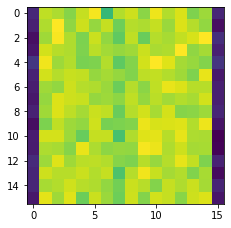

In [21]:
import matplotlib.pyplot as plt
import registration_tests as reg_t
import numpy as np
#I = plt.imread('../data/cameraman.tif')
#J = plt.imread('../data/cameraman.tif')
N1 = np.random.randint(255, size=(512, 512))
N2 = np.random.randint(255, size=(512, 512))
reg_t.joint_histogram_test(N1,N2)


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>  

### *Exercise 2.2.1:*

Go over the implementation and make sure you understand the functionality of all the steps in the code. Implement the last missing step in the computation of the joint histogram.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>  

### *Question 2.2.1:*

One of the parameters of the function is num bins, which defines the number of bins of the joint histogram. The default value for this parameter in this implementation is chosen to be 16. We mostly work with 8-bit images that have 256 possible values for the pixel intensities, which means that num bins can go as high as 256. However, there is a trade-off between choosing num bins too low or too high. What is this trade-off?

<font style="color:red">Type your answer here</font>

<div id="mi"></div>

### 2.3 Mutual Information

Compared to the above measures, mutual information (MI) makes very few a priori assumptions about registered objects, which is why it can be applied to larger dimensional registration and many other imaging situations. 

Intuitively, MI tries to find out how much information we have about the pixel intensity at the same location in image $J$ provided that we know the pixel intensity value at some location in the fixed image $I$. MI is therefore essentially a reduction in the uncertainty of $Y$ due to the knowledge of $I$. Given the joint PMF of two images and the two marginal PMF’s, the mutual information between the two images can be computed with the following formula: 

\begin{equation}
M I(I, J)=\sum_{i=1}^{n} \sum_{j=1}^{n} p_{I, J}(i, j) \log \frac{p_{I, J}(i, j)}{p_{I}(i) p_{J}(j)}
\end{equation}

The unit of MI depends on the particular log function: when using the natural logarithm, the unit is nats, when using base 2 logarithm, the unit is bits. In its essence, MI is a measure of the “compactness” of the joint PMF of two images. When the two images are well registered, the joint PMF is compact. When the two images are not well aligned the joint PMF is “spread out”. 

Remember that the joint histogram is an estimate of the joint PMF. Thus, in the previous equation, we can "plug in" the joint histogram for $p_{I, J}$, and analogously, the marginal histograms (the histograms of the individual images) for $p_{I}$ and $p_{J}$. The two sum operators go over all bins in the joint histogram.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>  

### *Exercise 2.3.1:*

A template for implementation of mutual information given a joint histogram of two images is given in the Python function `mutual_information()` in `SECTION 3` of the `registration.py` module. As before, the file already contains all the pre-processing steps but the actual computation of the mutual information is missing. The only missing piece of code in the template file is implementation of the above formula for mutual information. Implement the missing functionality.

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>  

### *Exercise 2.3.2:*

Use some of the properties of mutual information to test your implementation. Write these tests in the provided `mutual_information_test()` script in `SECTION 3` of the `registration_tests.py` module. (**Tip**: What would be the mutual information of two random noise images? You can generate random noise `uint8` images with `np.random.randint(255, size=(512, 512))`)

In [3]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import mutual_information_test

mutual_information_test()

-219.38607834160027
-0.00802881534482175


<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div>  

### *Exercise 2.3.3:*

An alternative formula for mutual information is:

$$
MI(I,J)=H(I)+H(J)-H(I, J)
$$

In the previous equation, $H(I)$ and $H(J)$ is the entropy of the images $I$ and $J$ and $H(I,J)$ is their joint entropy. 

Find out the equation for the entropy and implement mutual information, using this formula, in the `mutual_information_e()` function in `SECTION 3` of the `registration.py` module. Test your implementation with the provided `mutual_information_e_test()` script. Make sure that both implementations output equal values (very small differences are possible due to rounding errors).

In [9]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_tests import mutual_information_e_test

mutual_information_e_test()

NameError: name 'MI' is not defined

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>  

### *Question 2.3.1:*

When is mutual information preferable over sum of squared errors and normalized cross-correlation as an image similarity metric? Motivate your answer.


<font style="color:red">Type your answer here</font>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div>  

### *Question 2.3.2:*

The output of `mutual_information()` is described as "*mutual information in nat units*". What change in the code would you have to make to output the mutual information in bits? Does it make a difference which units you output when you use the mutual information metric in practice (for example, to perform image registration)?

<font style="color:red">Type your answer here</font>